### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [4]:
print(tienda1.columns)
print(tienda2.columns)
print(tienda3.columns)
print(tienda4.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


In [6]:
#Convertir la columna 'Fecha de compra' a datetime
tienda1['Fecha de Compra'] = pd.to_datetime(tienda1['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')


#1. Análisis de facturación
En este primer análisis, debemos calcular el ingreso total de cada tienda. Sumaremos todos los valores de la columna precio de cada conjunto de datos de la tienda para estimar los ingresos que se tienen de las tiendas para evaluar criterios.


In [10]:
total_precio_tienda1 = tienda1['Precio'].sum()
total_precio_tienda2 = tienda2['Precio'].sum()
total_precio_tienda3 = tienda3['Precio'].sum()
total_precio_tienda4 = tienda4['Precio'].sum()

print(f"Total ingresos tienda 1: {total_precio_tienda1:,.2f}")
print(f"Total ingresos tienda 2: {total_precio_tienda2:,.2f}")
print(f"Total ingresos tienda 3: {total_precio_tienda3:,.2f}")
print(f"Total ingresos tienda 4: {total_precio_tienda4:,.2f}")
print(f"Total de ingresos de todas las tiendas: ${(total_precio_tienda1 + total_precio_tienda2 + total_precio_tienda3 + total_precio_tienda4):,.2f}")

Total ingresos tienda 1: 1,150,880,400.00
Total ingresos tienda 2: 1,116,343,500.00
Total ingresos tienda 3: 1,098,019,600.00
Total ingresos tienda 4: 1,038,375,700.00
Total de ingresos de todas las tiendas: $4,403,619,200.00


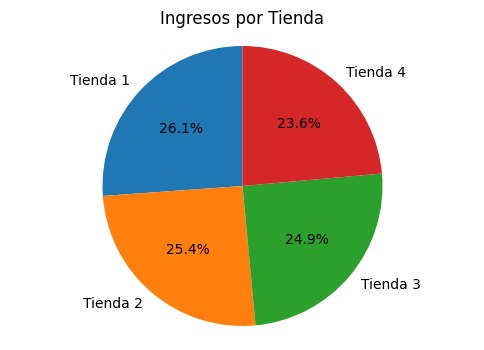

In [22]:
# Graficando los resultados con Matplotlib
import matplotlib.pyplot as plt

# Datos de ingresos de cada tienda
ingresos = {
    'Tienda 1': total_precio_tienda1,
    'Tienda 2': total_precio_tienda2,
    'Tienda 3': total_precio_tienda3,
    'Tienda 4': total_precio_tienda4
}

nombres_tiendas = list(ingresos.keys())
valores_ingresos = list(ingresos.values())

# Crear la gráfica de torta
plt.figure(figsize=(6, 4))  # Ajustar el tamaño de la figura
plt.pie(valores_ingresos, labels=nombres_tiendas, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Para que el círculo se vea como un círculo
plt.title('Ingresos por Tienda')
plt.show()


In [17]:
from urllib.request import urlopen
import csv

# URLs corregidas (asegurando que cada tienda tenga su URL correcta)
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

urls = [url_tienda1, url_tienda2, url_tienda3, url_tienda4]

def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

total_facturacion = 0

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    facturacion_tienda = sum(float(venta['Precio']) for venta in datos_tienda)

    print(f"Facturación Tienda {i+1}: ${facturacion_tienda:,.2f}")
    total_facturacion += facturacion_tienda

print(f"\nFacturación total de todas las tiendas: ${total_facturacion:,.2f}")

Facturación Tienda 1: $1,150,880,400.00
Facturación Tienda 2: $1,116,343,500.00
Facturación Tienda 3: $1,098,019,600.00
Facturación Tienda 4: $1,038,375,700.00

Facturación total de todas las tiendas: $4,403,619,200.00


In [21]:
# Utilizando Pandas
import pandas as pd

# Definir las URLs correctamente
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

urls = [url_tienda1, url_tienda2, url_tienda3, url_tienda4]
total_general = 0

for i, url in enumerate(urls):
    # Lectura simplificada y correcta del CSV
    df = pd.read_csv(url)

    # Conversión de precios (aunque generalmente pandas lo hace automáticamente)
    df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
    total = df['Precio'].sum()

    print(f"Total ingresos tienda {i+1}: ${total:,.2f}")
    total_general += total

print(f"\nTotal de ingresos de todas las tiendas: ${total_general:,.2f}")


Total ingresos tienda 1: $1,150,880,400.00
Total ingresos tienda 2: $1,116,343,500.00
Total ingresos tienda 3: $1,098,019,600.00
Total ingresos tienda 4: $1,038,375,700.00

Total de ingresos de todas las tiendas: $4,403,619,200.00


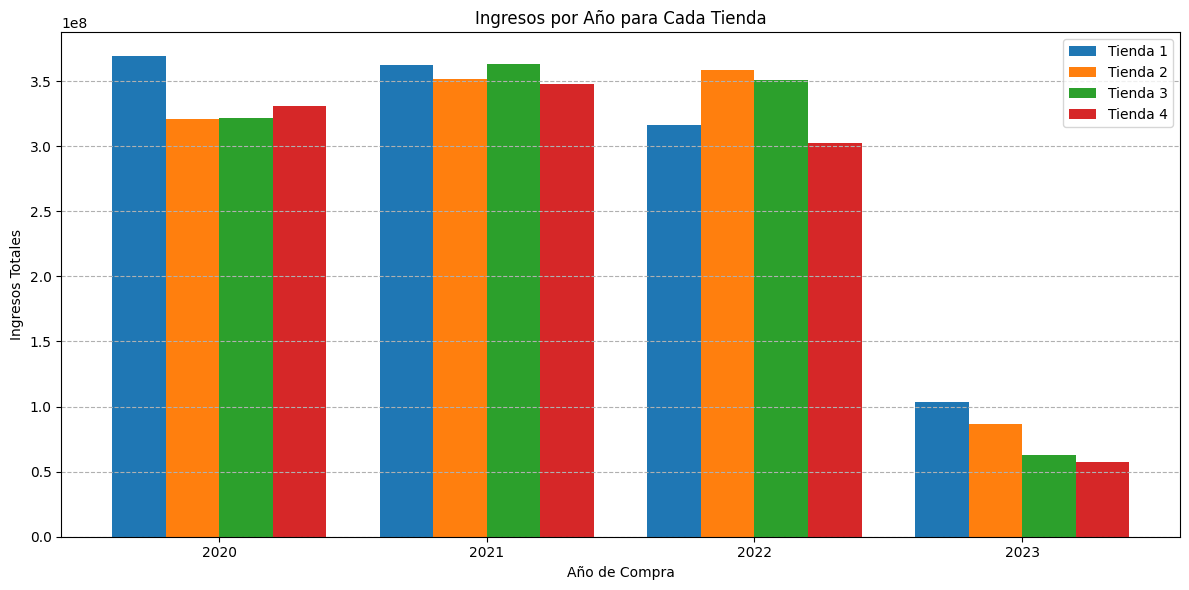

In [23]:
# Crea una función para procesar cada tienda
def procesar_tienda(tienda, nombre_tienda):
  # Extraer el año de la fecha de compra
  tienda['Año de Compra'] = tienda['Fecha de Compra'].dt.year

  # Agrupar por año y sumar los ingresos
  ingresos_por_año = tienda.groupby('Año de Compra')['Precio'].sum()

  return ingresos_por_año

# Procesar cada tienda
ingresos_tienda1 = procesar_tienda(tienda1, 'Tienda 1')
ingresos_tienda2 = procesar_tienda(tienda2, 'Tienda 2')
ingresos_tienda3 = procesar_tienda(tienda3, 'Tienda 3')
ingresos_tienda4 = procesar_tienda(tienda4, 'Tienda 4')

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Graficar cada tienda
plt.bar(ingresos_tienda1.index - 0.3, ingresos_tienda1.values, width=0.2, label='Tienda 1')
plt.bar(ingresos_tienda2.index - 0.1, ingresos_tienda2.values, width=0.2, label='Tienda 2')
plt.bar(ingresos_tienda3.index + 0.1, ingresos_tienda3.values, width=0.2, label='Tienda 3')
plt.bar(ingresos_tienda4.index + 0.3, ingresos_tienda4.values, width=0.2, label='Tienda 4')

plt.xlabel('Año de Compra')
plt.ylabel('Ingresos Totales')
plt.title('Ingresos por Año para Cada Tienda')
plt.xticks(ingresos_tienda1.index) # Asegurar que los años se muestren correctamente
plt.legend()
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()  # Evita que las etiquetas se superpongan
plt.show()

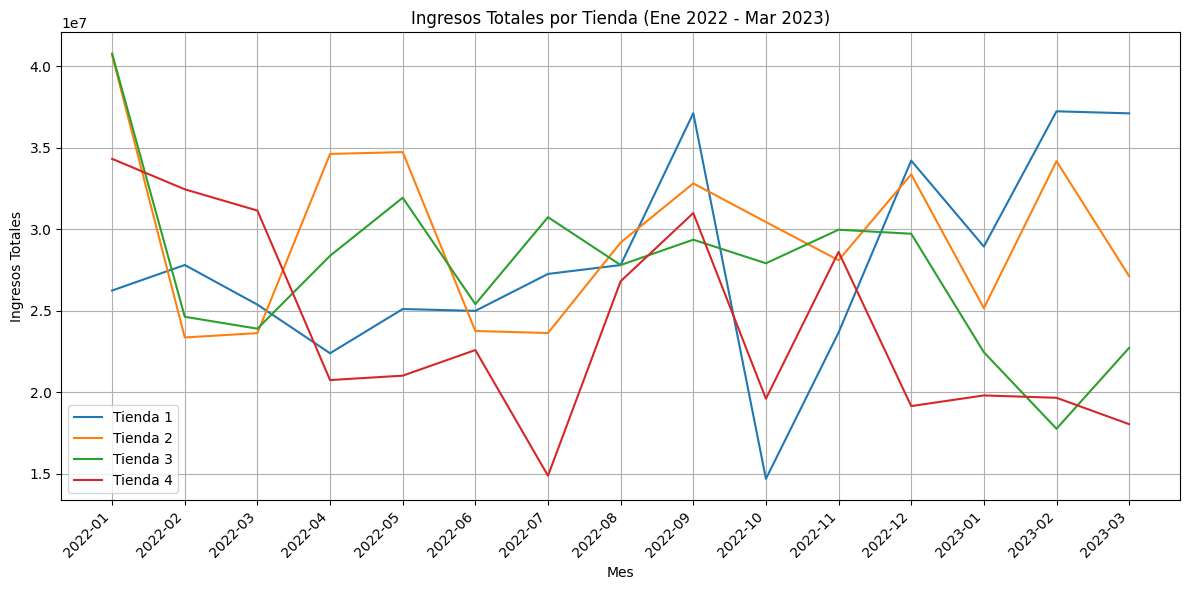

In [25]:
# Evaluando en un periodo de tiempo.
tiendas = [tienda1, tienda2, tienda3, tienda4]
datos_combinados = pd.concat(tiendas, keys=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], names=['Tienda', 'Indice'])

# Filtrar datos para el período (enero 2022 a marzo 2023)
fecha_inicio = pd.to_datetime('2022-01-01')
fecha_fin = pd.to_datetime('2023-03-31')

datos_filtrados = datos_combinados[(datos_combinados['Fecha de Compra'] >= fecha_inicio) & (datos_combinados['Fecha de Compra'] <= fecha_fin)]


# Agrupar datos por tienda y mes, luego sumar ingresos
ingresos_mensuales_por_tienda = datos_filtrados.groupby(['Tienda', datos_filtrados['Fecha de Compra'].dt.to_period('M')])['Precio'].sum().reset_index()


# Crear el gráfico
plt.figure(figsize=(12, 6))

for tienda in ingresos_mensuales_por_tienda['Tienda'].unique():
    datos_tienda = ingresos_mensuales_por_tienda[ingresos_mensuales_por_tienda['Tienda'] == tienda]
    plt.plot(datos_tienda['Fecha de Compra'].astype(str), datos_tienda['Precio'], label=tienda)

plt.xlabel('Mes')
plt.ylabel('Ingresos Totales')
plt.title('Ingresos Totales por Tienda (Ene 2022 - Mar 2023)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda